In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\User\OneDrive\Stalinis kompiuteris\Python mokymai\GIT_Repository\python_mokymai


In [2]:
#nuskaitykite auto.csv failą į dataframe'ą.

# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km

# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.

# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

auto_data = pd.read_csv('auto.csv', sep='|')[['gamintojas', 'rida', 'price', 'pagaminimo_data', 'kuro_tipas']]
auto_data.head(3)

,gamintojas,rida,price,pagaminimo_data,kuro_tipas
0,BMW,253 000 km,19 500,2005-12,Benzinas
1,Mitsubishi,195 405 km,2 700,2006,Benzinas
2,Seat,129 800 km,13 490,2019-11,Dyzelinas


In [3]:
def fix_rida(a):
    try:
        rida = float(a[:-3].replace(' ', ''))
    except:
        return 0
    else:
        return rida
def fix_price(a): return float(str(a).replace(' ', ''))
def fix_pagaminimo_data(a): return int(str(a)[:4])

auto_data['rida'] = auto_data['rida'].apply(fix_rida)
auto_data['price'] = auto_data['price'].apply(fix_price)
auto_data['amzius'] = 2024 - auto_data['pagaminimo_data'].apply(fix_pagaminimo_data)

auto_data.head(3)

,gamintojas,rida,price,pagaminimo_data,kuro_tipas,amzius
0,BMW,253000.0,19500.0,2005-12,Benzinas,19
1,Mitsubishi,195405.0,2700.0,2006,Benzinas,18
2,Seat,129800.0,13490.0,2019-11,Dyzelinas,5


In [4]:
def ridos_intervalas(a): return int(np.ceil(a/15000)*15000)
auto_data['ridos_intervalas'] = auto_data['rida'].apply(ridos_intervalas)
auto_data.head(3)

,gamintojas,rida,price,pagaminimo_data,kuro_tipas,amzius,ridos_intervalas
0,BMW,253000.0,19500.0,2005-12,Benzinas,19,255000
1,Mitsubishi,195405.0,2700.0,2006,Benzinas,18,210000
2,Seat,129800.0,13490.0,2019-11,Dyzelinas,5,135000


In [5]:
average_price = auto_data['price'].mean()
above_average_price = auto_data.groupby('gamintojas').mean(numeric_only=True).sort_values(by='price', ascending=False).query('price > @average_price').reset_index()
print(above_average_price)

       gamintojas           rida          price     amzius  ridos_intervalas
0    Aston Martin   45000.000000  125000.000000   9.000000      45000.000000
1         Porsche  103957.400000   61999.900000   8.200000     111000.000000
2           Tesla  104155.777778   45666.666667   5.888889     110000.000000
3      Land Rover  133625.000000   40925.000000   6.750000     138750.000000
4        Maserati  215000.000000   34950.000000   7.000000     225000.000000
5         Pontiac  203009.000000   23250.000000  41.500000     210000.000000
6         Lincoln   79000.000000   19500.000000  55.000000      90000.000000
7           Lexus  188518.416667   17013.250000  12.583333     193750.000000
8           Iveco  249641.250000   16124.000000   9.125000     256875.000000
9   Mercedes-Benz  261259.214689   15080.276836  15.186441     268305.084746
10       Infiniti  178815.200000   12790.000000  11.400000     186000.000000
11         Ligier    9000.000000   12200.000000   3.000000      15000.000000

In [6]:
top5_by_avg_price = auto_data.groupby('gamintojas').mean(numeric_only=True).sort_values(by='price').reset_index().query('price > @average_price').tail(5)
top5_by_avg_price.head()

,gamintojas,rida,price,amzius,ridos_intervalas
46,Maserati,215000.000000,34950.000000,7.000000,225000.0
47,Land Rover,133625.000000,40925.000000,6.750000,138750.0
48,Tesla,104155.777778,45666.666667,5.888889,110000.0
49,Porsche,103957.400000,61999.900000,8.200000,111000.0
50,Aston Martin,45000.000000,125000.000000,9.000000,45000.0


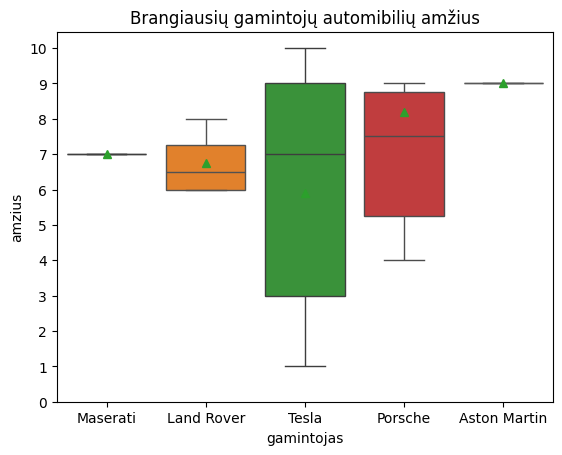

In [53]:
fig, axes = plt.subplots()

for gamintojas in top5_by_avg_price['gamintojas']:
    axes = sns.boxplot(data=auto_data.query('gamintojas == @gamintojas'), x= 'gamintojas', y='amzius', showmeans=True, showfliers=False)

axes.set_title('Brangiausių gamintojų automibilių amžius')
axes.set_yticks(range(0,11))
plt.show()

In [9]:
avg_price_by_interval = auto_data.query('ridos_intervalas >0 & ridos_intervalas <1000000').groupby('ridos_intervalas').mean(numeric_only=True).reset_index()
avg_price_by_interval.head()

,ridos_intervalas,rida,price,amzius
0,15000,6433.687500,25767.770833,11.666667
1,30000,23145.375000,38494.093750,5.375000
2,45000,37060.783784,34230.756757,5.648649
3,60000,52391.148148,31435.555556,10.333333
4,75000,68921.232143,17906.125000,9.607143


<function matplotlib.pyplot.show(close=None, block=None)>

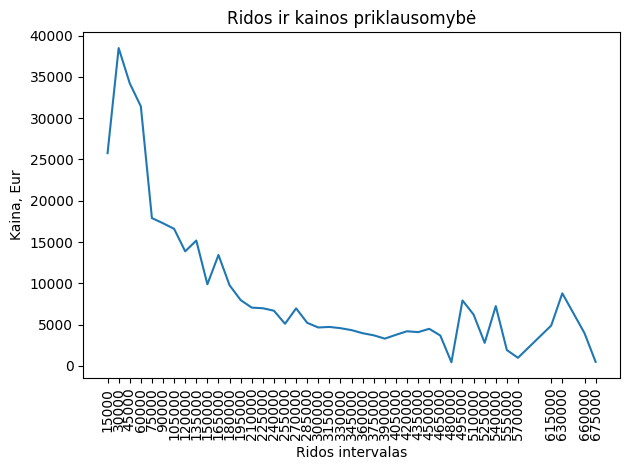

In [31]:
fig, axis = plt.subplots()
axis.plot(avg_price_by_interval['ridos_intervalas'], avg_price_by_interval['price'])
axis.set_xticks(avg_price_by_interval['ridos_intervalas'])
axis.set_title('Ridos ir kainos priklausomybė')
axis.set_xlabel('Ridos intervalas')
axis.set_ylabel('Kaina, Eur')
plt.xticks(rotation=90)
fig.tight_layout()
plt.show

In [13]:
import warnings
warnings.filterwarnings('ignore')

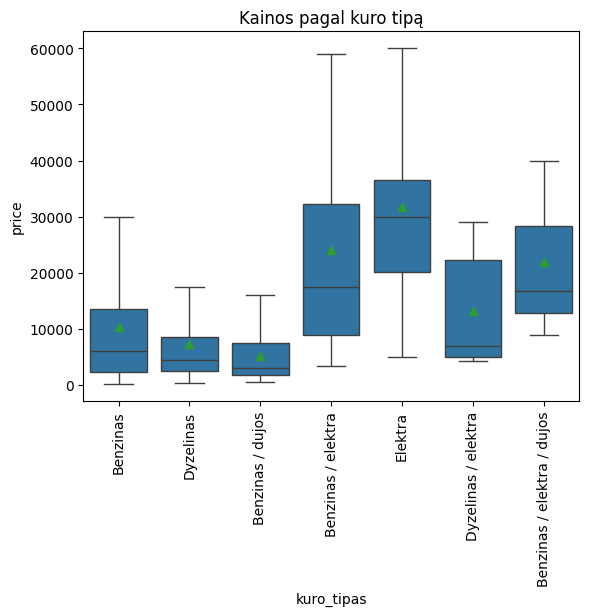

In [23]:
fig, axis = plt.subplots()
axis = sns.boxplot(data=auto_data, x=auto_data['kuro_tipas'], y=auto_data['price'], showmeans=True, showfliers=False).set_title('Kainos pagal kuro tipą')
plt.xticks(rotation=90)
plt.show()

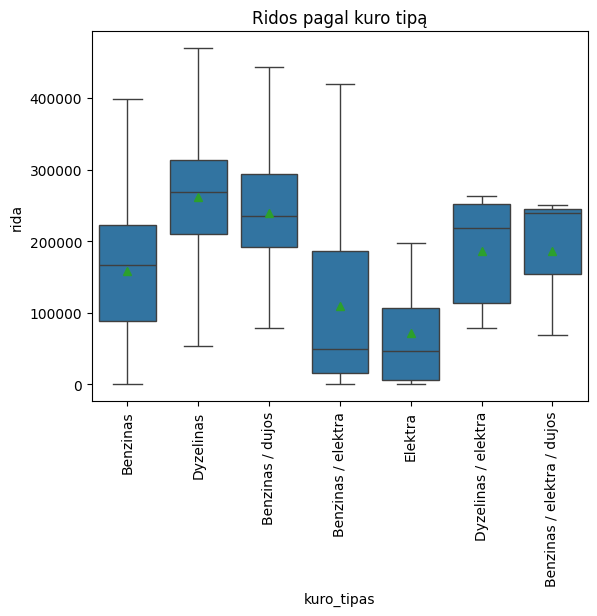

In [32]:
fig, axis = plt.subplots()
axis = sns.boxplot(data=auto_data.query('rida >0'), x=auto_data['kuro_tipas'], y=auto_data['rida'], showmeans=True, showfliers=False).set_title('Ridos pagal kuro tipą')
plt.xticks(rotation=90)
plt.show()

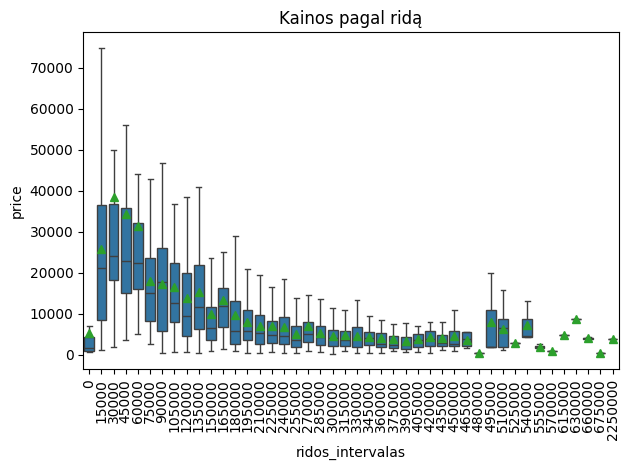

In [29]:
fig, axis = plt.subplots()
axis = sns.boxplot(data=auto_data.query('rida >0'), x=auto_data['ridos_intervalas'], y=auto_data['price'], showmeans=True, showfliers=False).set_title('Kainos pagal ridą')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

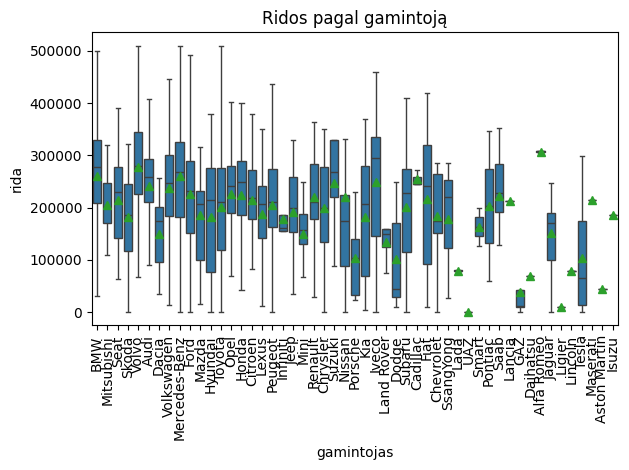

In [33]:
fig, axis = plt.subplots()
axis = sns.boxplot(data=auto_data.query('rida >0'), x=auto_data['gamintojas'], y=auto_data['rida'], showmeans=True, showfliers=False).set_title('Ridos pagal gamintoją')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
# sns.boxplot(data=auto_data.query('gamintojas == "Mercedes-Benz" and kuro_tipas == "Benzinas" and ridos_intervalas == 210000 and amzius == 12'), x='gamintojas', y='price')
auto_data.query('gamintojas == "Mercedes-Benz" and kuro_tipas == "Benzinas" and amzius == 12')

,gamintojas,rida,price,pagaminimo_data,kuro_tipas,amzius,ridos_intervalas
931,Mercedes-Benz,180554.0,9600.0,2012-06,Benzinas,12,195000
1894,Mercedes-Benz,180554.0,9600.0,2012-06,Benzinas,12,195000


In [44]:
auto_data.query('gamintojas == "Mercedes-Benz" and kuro_tipas == "Benzinas" and ridos_intervalas == 210000')

,gamintojas,rida,price,pagaminimo_data,kuro_tipas,amzius,ridos_intervalas
2204,Mercedes-Benz,200500.0,35900.0,2015,Benzinas,9,210000


In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\User\OneDrive\Stalinis kompiuteris\Python mokymai\GIT_Repository\python_mokymai


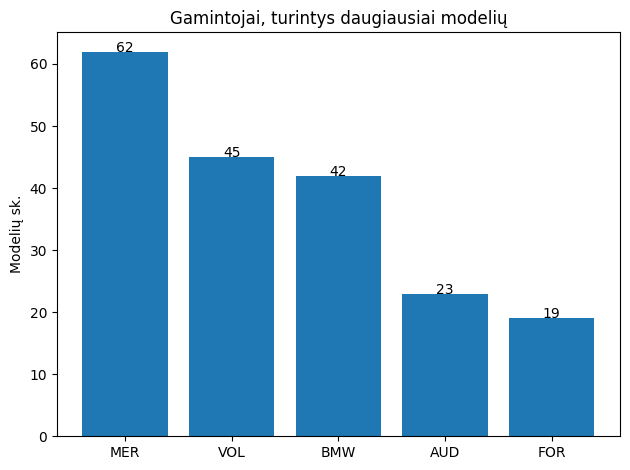

In [19]:
#nuskaitykite auto.csv, ir pridėkite prie šios lentelės tokių stulpelių : gamintojo trys pirmos raidės didžiosiomis,
# suskaičiuokite, kiek kiekvienas gamintojas turėjo skirtingų automobilių modelių,
# ADVANCED - pavaizduokite tai grafiškai. Grafiko pobūdį ir kaip tai padarysite - renkatės patys. Hint - .groupby().reset_index() gali duoti lentelę
# kuri gali labai palengvinti užduoties atlikimą
# gamitojus imate tik 5kis, kurių yra daugiausiai

auto_data = pd.read_csv('auto.csv', sep='|')[['gamintojas', 'modelis']]

auto_data['GMT'] = auto_data['gamintojas'].str[:3].str.upper()
auto_data.head()
gamintojai_grouped = auto_data.groupby(['GMT','modelis']).value_counts().reset_index()['GMT'].value_counts().reset_index()

fig, axis = plt.subplots()

axis.bar(gamintojai_grouped.head(5)['GMT'], gamintojai_grouped.head(5)['count'])
axis.set_title('Gamintojai, turintys daugiausiai modelių')
axis.set_ylabel('Modelių sk.')

for i in range(5):
        plt.text(i, gamintojai_grouped.head(5)['count'][i], gamintojai_grouped.head(5)['count'][i], ha = 'center')

fig.tight_layout()
plt.show()

In [23]:
pip install undetected-chromedriver selenium beautifulsoup4

     ---------------------------------------- 0.0/65.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/65.4 kB ? eta -:--:--
     ----------------------- -------------- 41.0/65.4 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 65.4/65.4 kB 441.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
    --------------------------------------- 0.2/10.5 MB 5.0 MB/s eta 0:00:03
   - ----------------------------------

In [1]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [2]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

df = pd.DataFrame()
df['a'] = np.random.randint(10,50,10)
df.to_csv('demoDF.csv', sep=';')

c:\Users\User\OneDrive\Stalinis kompiuteris\Python mokymai\GIT_Repository\python_mokymai
